In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

model = pd.read_csv(r"C:\Users\HP\Downloads\datasets/breast-cancer.csv")

print("Shape of the dataset: ", model.shape)
print("Size of the dataset: ", model.size)
print(model.columns)

Shape of the dataset:  (569, 32)
Size of the dataset:  18208
Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [7]:
print(model.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [6]:
print(model.dtypes)

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

C:\Users\HP\AppData\Local\Temp\ipykernel_12980\4033364174.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(model.corr(), annot=True, cmap='coolwarm')


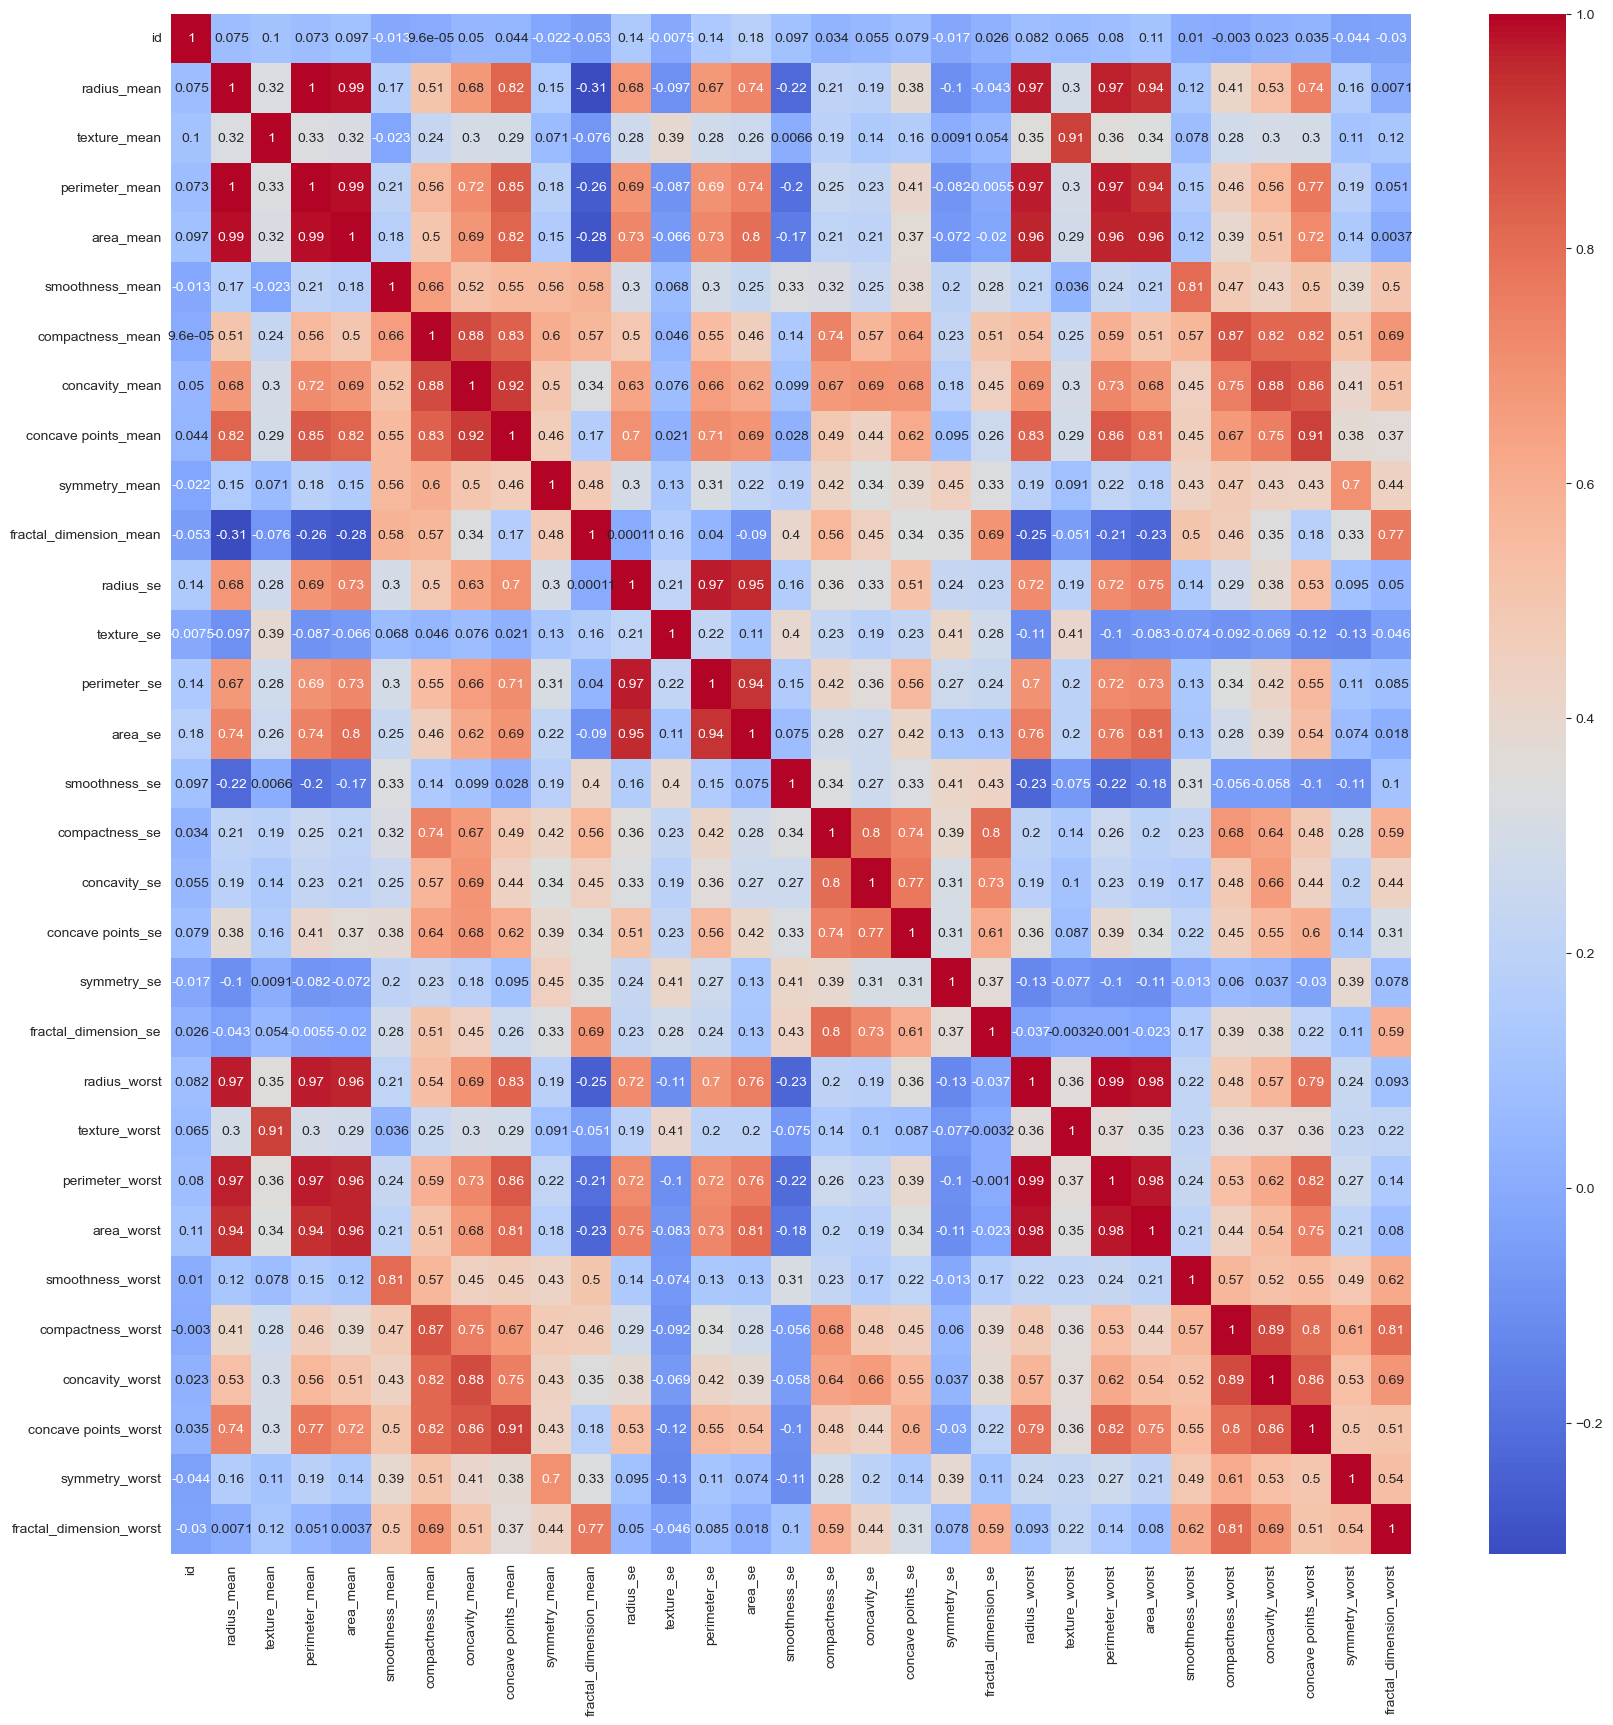

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(model.corr(), annot=True, cmap='coolwarm')
plt.show()

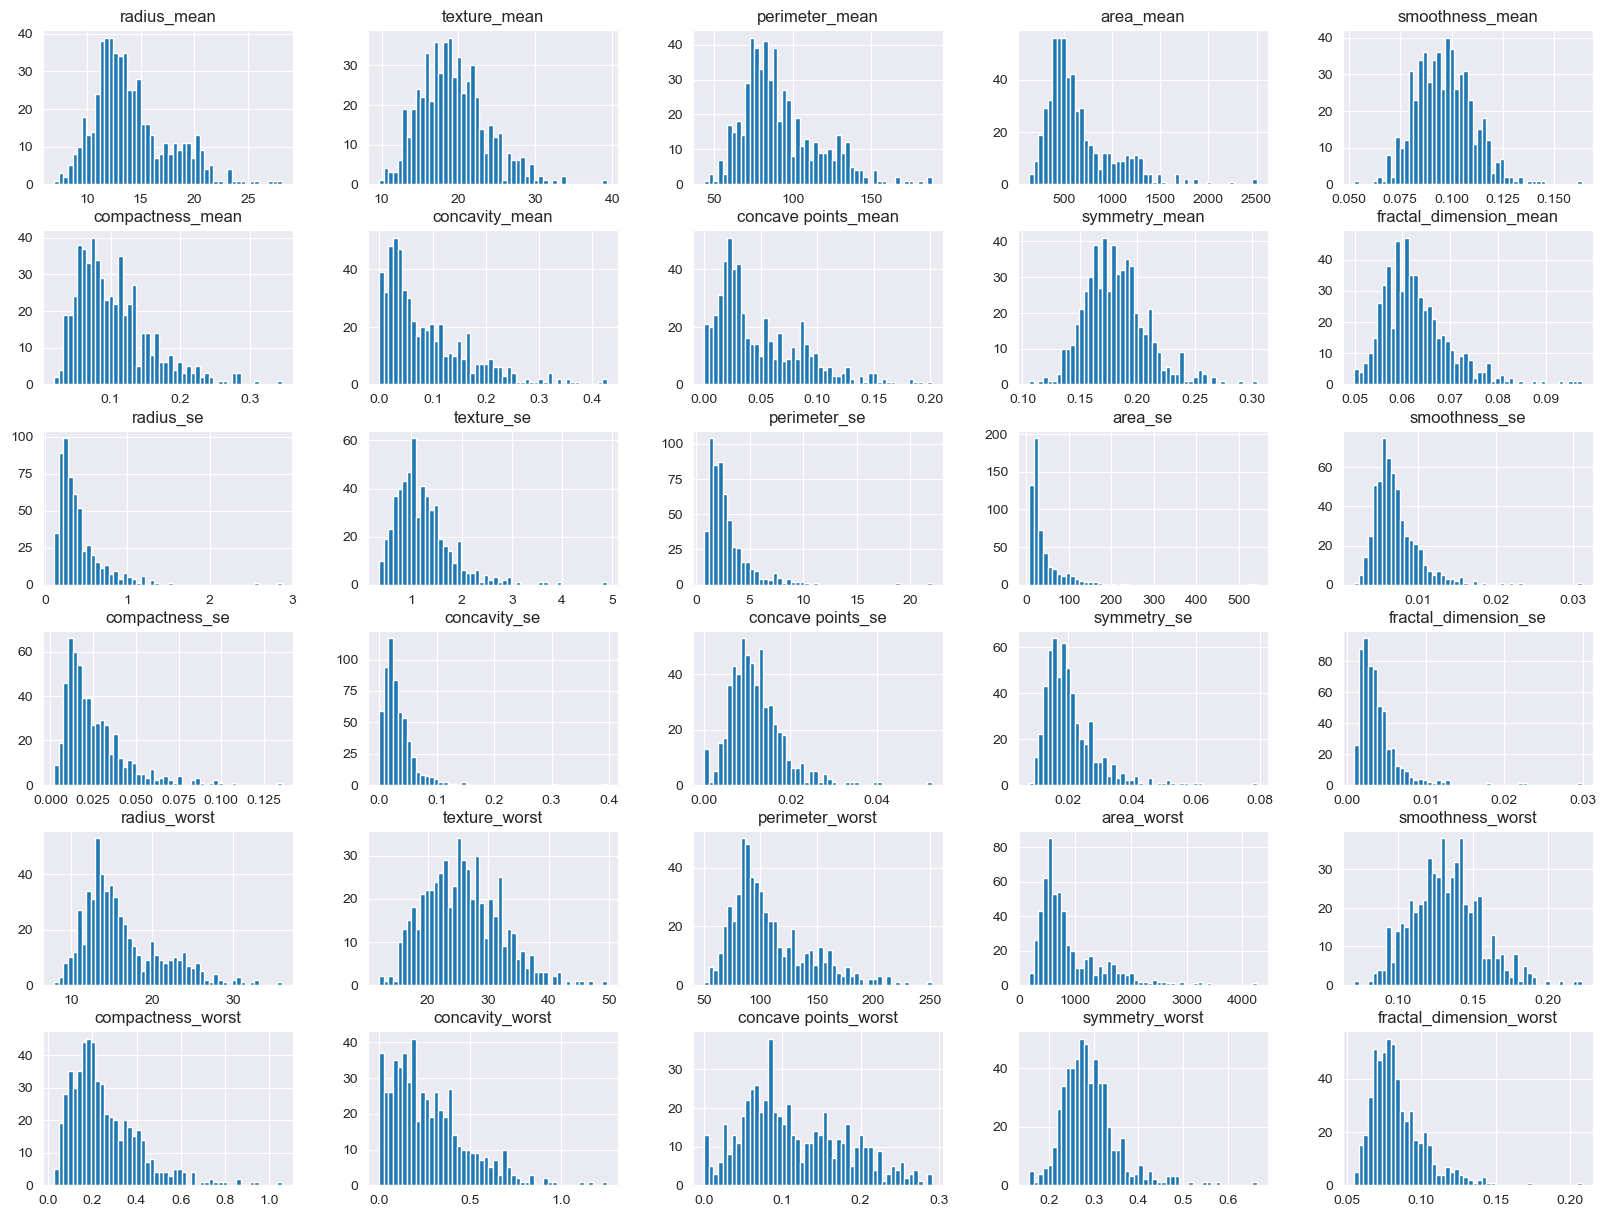

In [12]:
model.iloc[:,2:].hist(bins=50, figsize=(20,15))
plt.show()


In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
#
# # Drop the first column (ID column)
# model = model.drop(columns=[0])
#
# # Rename the target variable column to 'target'
# model = model.rename(columns={1: 'target'})
#
# # Map the target variable to 0 and 1
# model['target'] = model['target'].map({'B': 0, 'M': 1})
#
# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(model.iloc[:,1:], model['target'], test_size=0.3, random_state=42)
#
# # Standardize the features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)



In [14]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load the breast cancer dataset
X, y = load_breast_cancer(return_X_y=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the models
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    SVC(),
    MLPClassifier(),
    RandomForestClassifier()
]

# Train and evaluate the models
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    print(type(model).__name__)
    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Recall:", rec)
    print("F1-score:", f1)
    print("AUC-ROC:", auc_roc)
    print()


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression
Accuracy: 0.9707602339181286
Precision: 0.963963963963964
Recall: 0.9907407407407407
F1-score: 0.9771689497716894
AUC-ROC: 0.9636243386243386

DecisionTreeClassifier
Accuracy: 0.9298245614035088
Precision: 0.9615384615384616
Recall: 0.9259259259259259
F1-score: 0.9433962264150944
AUC-ROC: 0.9312169312169313

SVC
Accuracy: 0.935672514619883
Precision: 0.907563025210084
Recall: 1.0
F1-score: 0.9515418502202644
AUC-ROC: 0.9126984126984127



C:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier
Accuracy: 0.9590643274853801
Precision: 0.9391304347826087
Recall: 1.0
F1-score: 0.968609865470852
AUC-ROC: 0.9444444444444444

RandomForestClassifier
Accuracy: 0.9766081871345029
Precision: 0.9727272727272728
Recall: 0.9907407407407407
F1-score: 0.981651376146789
AUC-ROC: 0.9715608465608465



C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


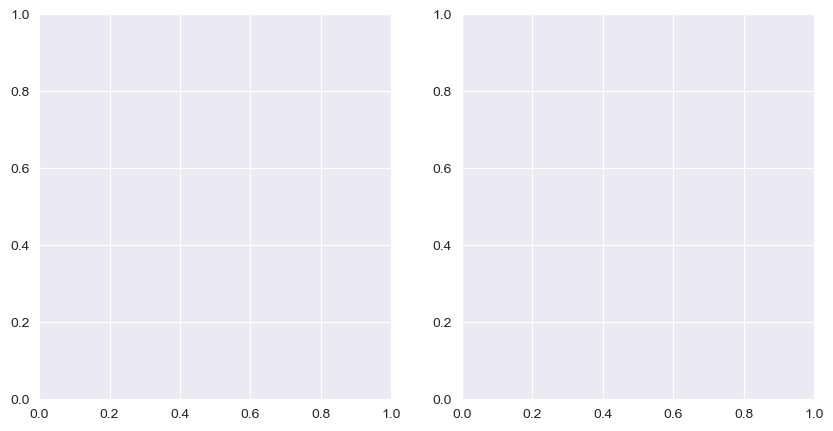

In [17]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Load the breast cancer dataset
X, y = load_breast_cancer(return_X_y=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the models
rf = RandomForestClassifier()
lr = LogisticRegression()

# Train the models
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)

# Visualize the decision boundaries
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

plt.show()


In [18]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier

# Load the breast cancer dataset
X, y = load_breast_cancer(return_X_y=True)

# Initialize the Random Forest Classifier
rf = RandomForestClassifier()

# Train the Random Forest Classifier on the entire dataset
rf.fit(X, y)

# Create a new tumor with the same features as the first tumor in the dataset
new_tumor = X[0]

# Reshape the tumor to match the input format expected by the model
new_tumor = new_tumor.reshape(1, -1)

# Use the trained model to predict the diagnosis of the new tumor
prediction = rf.predict(new_tumor)

# Print the predicted diagnosis
if prediction == 0:
    print("The new tumor is benign.")
else:
    print("The new tumor is malignant.")


The new tumor is benign.
